## Import and Concatenation Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None) 


In [4]:
bnglr=pd.read_csv('Bangalore.csv')
chennai=pd.read_csv('Chennai.csv')
hyderabad=pd.read_csv('Hyderabad.csv')
delhi=pd.read_csv('delhi.csv')
jai=pd.read_csv('jaipur.csv')
kolk=pd.read_csv('kolkata.csv')

car = pd.concat([bnglr,chennai,hyderabad,delhi,jai,kolk],axis=0)

# Statistical information

In [7]:
car.info()
car.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8369 entries, 0 to 1380
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   it                             8369 non-null   int64  
 1   ft                             8369 non-null   object 
 2   bt                             8365 non-null   object 
 3   km                             8369 non-null   object 
 4   transmission                   8369 non-null   object 
 5   ownerNo                        8369 non-null   int64  
 6   owner                          8369 non-null   object 
 7   oem                            8369 non-null   object 
 8   model                          8369 non-null   object 
 9   modelYear                      8369 non-null   int64  
 10  centralVariantId               8369 non-null   int64  
 11  variantName                    8369 non-null   object 
 12  price                          8369 non-null   object

,it,ownerNo,modelYear,centralVariantId,priceSaving,priceFixedText,bottomData,Year of Manufacture,Seats.1,Displacement,No of Cylinder,Values per Cylinder,Seating Capacity,No Door Numbers,commonIcon.1
count,8369.0,8369.000000,8369.000000,8369.000000,0.0,0.0,0.0,8349.000000,8363.000000,8365.000000,8338.000000,8318.000000,8363.000000,8358.000000,0.0
mean,0.0,1.360139,2016.503286,4962.537340,NaN,NaN,NaN,2016.547850,5.203276,1424.735923,3.802471,3.934359,5.203276,4.686049,NaN
std,0.0,0.641958,3.921465,2747.040479,NaN,NaN,NaN,3.811882,0.663789,477.629144,0.594613,0.792698,0.663789,0.485545,NaN
min,0.0,0.000000,1985.000000,5.000000,NaN,NaN,NaN,2002.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,NaN
25%,0.0,1.000000,2014.000000,2042.000000,NaN,NaN,NaN,2014.000000,5.000000,1197.000000,4.000000,4.000000,5.000000,4.000000,NaN
50%,0.0,1.000000,2017.000000,5320.000000,NaN,NaN,NaN,2017.000000,5.000000,1248.000000,4.000000,4.000000,5.000000,5.000000,NaN
75%,0.0,2.000000,2019.000000,7121.000000,NaN,NaN,NaN,2019.000000,5.000000,1498.000000,4.000000,4.000000,5.000000,5.000000,NaN
max,0.0,5.000000,2023.000000,11098.000000,NaN,NaN,NaN,2023.000000,10.000000,5000.000000,23.000000,69.000000,10.000000,6.000000,NaN


## Handling Missing Values

In [10]:
count=car.isnull().sum()
missing_value=pd.DataFrame(count,columns=['count'])
missing_value['percent']=(car.isnull().sum()/len(car))*100

missing_value

,count,percent
it,0,0.000000
ft,0,0.000000
bt,4,0.047795
km,0,0.000000
transmission,0,0.000000
ownerNo,0,0.000000
owner,0,0.000000
oem,0,0.000000
model,0,0.000000
modelYear,0,0.000000


In [12]:
#100% missing values- so dropping
car.drop(columns=['priceSaving', 'priceFixedText', 'bottomData', 'commonIcon.1'],axis=1,inplace=True)

#Dropping duplicate columns
#duplic = car.T.duplicated(keep=False)
#print("Duplicate columns:", car.columns[duplic].tolist())
car.drop(columns=['km','modelYear','owner','Fuel Type','transmission','Seats.1','Seats','Ownership','Wheel Size','Engine','Max Power.1', 'Max Torque',
                  'Alloy Wheel Size','centralVariantId','variantName','Engine Type','Displacement'],axis=1,inplace=True)

#NUll columns and Unwanted features some are highly corelated so dropping
car.drop(columns=['it','trendingText','commonIcon', 'features','Comfort & Convenience', 'Interior', 'Exterior', 'Safety','RTO','model',
                  'Entertainment & Communication','No of Cylinder', 'Values per Cylinder','Fuel Suppy System', 'BoreX Stroke','Drive Type',
                  'Compression Ratio', 'Turbo Charger','Wheel Base', 'Front Tread', 'Rear Tread',
                  'Kerb Weight', 'Gross Weight','Turning Radius', 'Front Brake Type','Rear Brake Type', 'Acceleration', 'Tyre Type',
                  'No Door Numbers', 'Cargo Volumn', 'Ground Clearance Unladen','car_links','priceActual' ],axis=1,inplace=True)

# Data Cleaning and Preprocessing

In [15]:
ncar = pd.read_excel('car_filter.xlsx')

In [17]:
ncar.head(5)

,fueltype,bodytype,No_owner,oemodel,price,InsuranceValidity,kmsDriven,EngineDisplacement,Transmission,YearofManufacture,Mileage,MaxPower,Max_power,Torqu,Torque_e,Color,SuperCharger,Length,Width,Height,SeatingCapacity,Steering Type,Topeed,City,GearBox
0,Petrol,Hatchback,3,Maruti,4.00,Third Party insurance,120000.0,998.0,Manual,2015.0,23.10,67,67.0,90n,90.0,White,No,3715.0,1635.0,1565.0,5.0,Power,150.0,Bangalore,5.0
1,Petrol,SUV,2,Ford,8.11,Comprehensive,32706.0,1497.0,Manual,2018.0,17.00,121,121.0,150n,150.0,White,No,3998.0,1765.0,1647.0,5.0,Power,NaN,Bangalore,5.0
2,Petrol,Hatchback,1,Tata,5.85,Comprehensive,11949.0,1199.0,Manual,2018.0,23.84,84b,84.0,114n,114.0,Red,No,3746.0,1647.0,1535.0,5.0,Power,150.0,Bangalore,5.0
3,Petrol,Sedan,1,Hyundai,4.62,Comprehensive,17794.0,1197.0,Manual,2014.0,19.10,81,81.0,113.7,113.7,Others,No,3995.0,1660.0,1520.0,5.0,Power,172.0,Bangalore,5.0
4,Diesel,SUV,1,Maruti,7.90,Third Party insurance,60000.0,1248.0,Manual,2015.0,23.65,88,88.0,200n,200.0,Gray,No,4300.0,1785.0,1595.0,5.0,Power,190.0,Bangalore,5.0


## Standardising Numerical and Categorical Columns 

In [20]:
ncar.drop(columns=['MaxPower','Max_power','Torqu'],axis=1,inplace=True)

ncar['InsuranceValidity']=ncar['InsuranceValidity'].replace('Not Available','Third Party insurance').replace('Third Party insurance ','Third Party insurance').replace('Third Party','Third Party insurance').replace('1','First Party insurance').replace('2','Second Party insurance').replace('Zero Dep','First Party insurance')
ncar['Steering Type']=ncar['Steering Type'].replace('power','Power').replace('Electronic','Electric').replace('Electrical','Electric').replace('electric','Electric').replace('EPAS','Electric').replace('Hydraulic','Electric')
ncar['SuperCharger']=ncar['SuperCharger'].replace('NO','No').replace('no','No').replace('yes','Yes')


color_counts = ncar['Color'].value_counts()
low_count_colors = color_counts[color_counts <= 50].index
ncar['Color'] = ncar['Color'].apply(lambda x: 'Others' if x in low_count_colors else x)

numerical_cols = ncar.select_dtypes(include=['int64','float64']).columns
categorical_cols = ncar.select_dtypes(include=['object']).columns


# Handling missing values for numerical columns
for col in numerical_cols:
    ncar[col] = ncar[col].fillna(ncar[col].mean())

# Handling missing values for categorical columns
for col in categorical_cols:
    ncar[col] = ncar[col].fillna(ncar[col].mode()[0])

print("Missing values have been handled and cleaned")

Cat=[]
Num=[]

for col in ncar.columns:
    if ncar[col].dtypes=='O':
        Cat.append(col)
    elif ncar[col].dtypes!='O':
        Num.append(col)

print(f'There are {len(Cat)} Category Features :\n',Cat)
print('-------------------'*6)
print(f'There are {len(Num)} Numerical Features :\n',Num)
        

columns_to_convert = ['No_owner','price','kmsDriven','YearofManufacture','GearBox']
ncar[columns_to_convert] = ncar[columns_to_convert].astype('int64')

ncar.head(3)

Missing values have been handled and cleaned
There are 9 Category Features :
 ['fueltype', 'bodytype', 'oemodel', 'InsuranceValidity', 'Transmission', 'Color', 'SuperCharger', 'Steering Type', 'City']
------------------------------------------------------------------------------------------------------------------
There are 13 Numerical Features :
 ['No_owner', 'price', 'kmsDriven', 'EngineDisplacement', 'YearofManufacture', 'Mileage', 'Torque_e', 'Length', 'Width', 'Height', 'SeatingCapacity', 'Topeed', 'GearBox']


,fueltype,bodytype,No_owner,oemodel,price,InsuranceValidity,kmsDriven,EngineDisplacement,Transmission,YearofManufacture,Mileage,Torque_e,Color,SuperCharger,Length,Width,Height,SeatingCapacity,Steering Type,Topeed,City,GearBox
0,Petrol,Hatchback,3,Maruti,4,Third Party insurance,120000,998.0,Manual,2015,23.10,90.0,White,No,3715.0,1635.0,1565.0,5.0,Power,150.000000,Bangalore,5
1,Petrol,SUV,2,Ford,8,Comprehensive,32706,1497.0,Manual,2018,17.00,150.0,White,No,3998.0,1765.0,1647.0,5.0,Power,175.711088,Bangalore,5
2,Petrol,Hatchback,1,Tata,5,Comprehensive,11949,1199.0,Manual,2018,23.84,114.0,Red,No,3746.0,1647.0,1535.0,5.0,Power,150.000000,Bangalore,5


In [22]:
ncar.dtypes

fueltype               object
bodytype               object
No_owner                int64
oemodel                object
price                   int64
InsuranceValidity      object
kmsDriven               int64
EngineDisplacement    float64
Transmission           object
YearofManufacture       int64
Mileage               float64
Torque_e              float64
Color                  object
SuperCharger           object
Length                float64
Width                 float64
Height                float64
SeatingCapacity       float64
Steering Type          object
Topeed                float64
City                   object
GearBox                 int64
dtype: object

In [24]:
ncar.isnull().sum()

fueltype              0
bodytype              0
No_owner              0
oemodel               0
price                 0
InsuranceValidity     0
kmsDriven             0
EngineDisplacement    0
Transmission          0
YearofManufacture     0
Mileage               0
Torque_e              0
Color                 0
SuperCharger          0
Length                0
Width                 0
Height                0
SeatingCapacity       0
Steering Type         0
Topeed                0
City                  0
GearBox               0
dtype: int64

In [26]:
for col in ncar.columns:
    unique_values = ncar[col].unique()
    nunique = ncar[col].nunique()
    print(f"Column '{col}' has the following {nunique} unique values:\n {unique_values}\n")


Column 'fueltype' has the following 4 unique values:
 ['Petrol' 'Diesel' 'gas' 'Electric']

Column 'bodytype' has the following 10 unique values:
 ['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Pickup Trucks'
 'Convertibles' 'Hybrids' 'Wagon']

Column 'No_owner' has the following 6 unique values:
 [3 2 1 4 5 0]

Column 'oemodel' has the following 33 unique values:
 ['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra'
 'Mercedes-Benz' 'BMW' 'Renault' 'Audi' 'Toyota' 'Mini' 'Kia' 'Skoda'
 'Volkswagen' 'Volvo' 'MG' 'Nissan' 'Fiat' 'Mahindra Ssangyong'
 'Mitsubishi' 'Jaguar' 'Land Rover' 'Chevrolet' 'Citroen' 'Opel'
 'Mahindra Renault' 'Isuzu' 'Lexus' 'Hindustan Motors' 'Porsche']

Column 'price' has the following 132 unique values:
 [    4     8     5     7    19     3    12     9     6    13    55    10
    22    49     2    41    17    25    44    11    20    36    16    79
    35    26    21    33    28    18    59    24    29    39    14    42
    67    30    23 

In [28]:
ncar.shape

(8369, 22)

In [30]:
ncar.describe(include='all')

,fueltype,bodytype,No_owner,oemodel,price,InsuranceValidity,kmsDriven,EngineDisplacement,Transmission,YearofManufacture,Mileage,Torque_e,Color,SuperCharger,Length,Width,Height,SeatingCapacity,Steering Type,Topeed,City,GearBox
count,8369,8369,8369.000000,8369,8369.000000,8369,8.369000e+03,8369.000000,8369,8369.000000,8369.000000,8369.000000,8369,8369,8369.000000,8369.000000,8369.000000,8369.000000,8369,8369.000000,8369,8369.000000
unique,4,10,NaN,33,NaN,4,NaN,NaN,2,NaN,NaN,NaN,12,2,NaN,NaN,NaN,NaN,3,NaN,6,NaN
top,Petrol,Hatchback,NaN,Maruti,NaN,Third Party insurance,NaN,NaN,Manual,NaN,NaN,NaN,Others,No,NaN,NaN,NaN,NaN,Power,NaN,Delhi,NaN
freq,5554,3571,NaN,2252,NaN,5215,NaN,NaN,6052,NaN,NaN,NaN,2485,8352,NaN,NaN,NaN,NaN,6678,NaN,1485,NaN
mean,NaN,NaN,1.360139,NaN,888.592663,NaN,5.898840e+04,1424.735923,NaN,2016.546541,19.255853,177.822703,NaN,NaN,4075.823040,1719.518465,1559.706876,5.203276,NaN,175.711088,NaN,5.459434
std,NaN,NaN,0.641958,NaN,7915.021811,NaN,7.405539e+04,477.514974,NaN,3.807418,3.960921,109.464719,NaN,NaN,505.313618,185.552486,162.026264,0.663551,NaN,20.259253,NaN,0.944218
min,NaN,NaN,0.000000,NaN,1.000000,NaN,1.010000e+02,0.000000,NaN,2002.000000,7.080000,4.800000,NaN,NaN,356.000000,159.000000,137.000000,2.000000,NaN,80.000000,NaN,1.000000
25%,NaN,NaN,1.000000,NaN,4.000000,NaN,3.000000e+04,1197.000000,NaN,2014.000000,17.010000,110.000000,NaN,NaN,3788.000000,1680.000000,1495.000000,5.000000,NaN,167.000000,NaN,5.000000
50%,NaN,NaN,1.000000,NaN,6.000000,NaN,5.370100e+04,1248.000000,NaN,2017.000000,19.020000,142.000000,NaN,NaN,3995.000000,1730.000000,1530.000000,5.000000,NaN,175.711088,NaN,5.000000
75%,NaN,NaN,2.000000,NaN,9.000000,NaN,8.000000e+04,1498.000000,NaN,2019.000000,21.400000,215.000000,NaN,NaN,4425.000000,1788.000000,1640.000000,5.000000,NaN,175.711088,NaN,6.000000


# Removing Outliers

In [32]:
numerical_cols = ncar.select_dtypes(include=['int64', 'float64']).columns

# Cleanning outliers using the IQR method
def clean_outliers_iqr(df, numerical_cols, method='remove'):
    cleaned_data = df.copy()
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'remove':
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
        elif method == 'cap':
            cleaned_data[col] = cleaned_data[col].clip(lower=lower_bound, upper=upper_bound)

    return cleaned_data

# Clean the data by removing outliers
cleaned_data_remove = clean_outliers_iqr(ncar, numerical_cols, method='remove')
print("Data cleaned by removing outliers. Remaining rows:", cleaned_data_remove.shape[0])

# Clean the data by capping outliers
cleaned_data_cap = clean_outliers_iqr(ncar, numerical_cols, method='cap')
print("Data cleaned by capping outliers. Remaining rows:", cleaned_data_cap.shape[0])


#cleaned_data_remove.to_excel('Cleaned_Cars_Data_Removed_Outliers.xlsx', index=False)
#cleaned_data_cap.to_excel('Cleaned_Cars_Data_Capped_Outlierss.xlsx', index=False)


Data cleaned by removing outliers. Remaining rows: 4700
Data cleaned by capping outliers. Remaining rows: 8369


In [34]:
carclean = pd.read_excel('Cleaned_Cars_Data_Capped_Outlierss.xlsx')


In [39]:
columns_to_convert = ['No_owner','price','kmsDriven','YearofManufacture','GearBox']
carclean[columns_to_convert] = carclean[columns_to_convert].astype('int64')
carclean.head(3)

,fueltype,bodytype,No_owner,oemodel,price,InsuranceValidity,kmsDriven,EngineDisplacement,Transmission,YearofManufacture,Mileage,Torque,Color,SuperCharger,Length,Width,Height,SeatingCapacity,Steering Type,Topspeed,City,GearBox
0,Petrol,Hatchback,3,Maruti,4,Third Party insurance,120000,998.0,Manual,2015,23.10,90.0,White,No,3715.0,1635.0,1565.0,5,Power,153.933369,Bangalore,5
1,Petrol,SUV,2,Ford,8,Comprehensive,32706,1497.0,Manual,2018,17.00,150.0,White,No,3998.0,1765.0,1647.0,5,Power,175.711088,Bangalore,5
2,Petrol,Hatchback,1,Tata,5,Comprehensive,11949,1199.0,Manual,2018,23.84,114.0,Red,No,3746.0,1647.0,1535.0,5,Power,153.933369,Bangalore,5


# Exploratory Data Analysis

### Numerical Visualisation

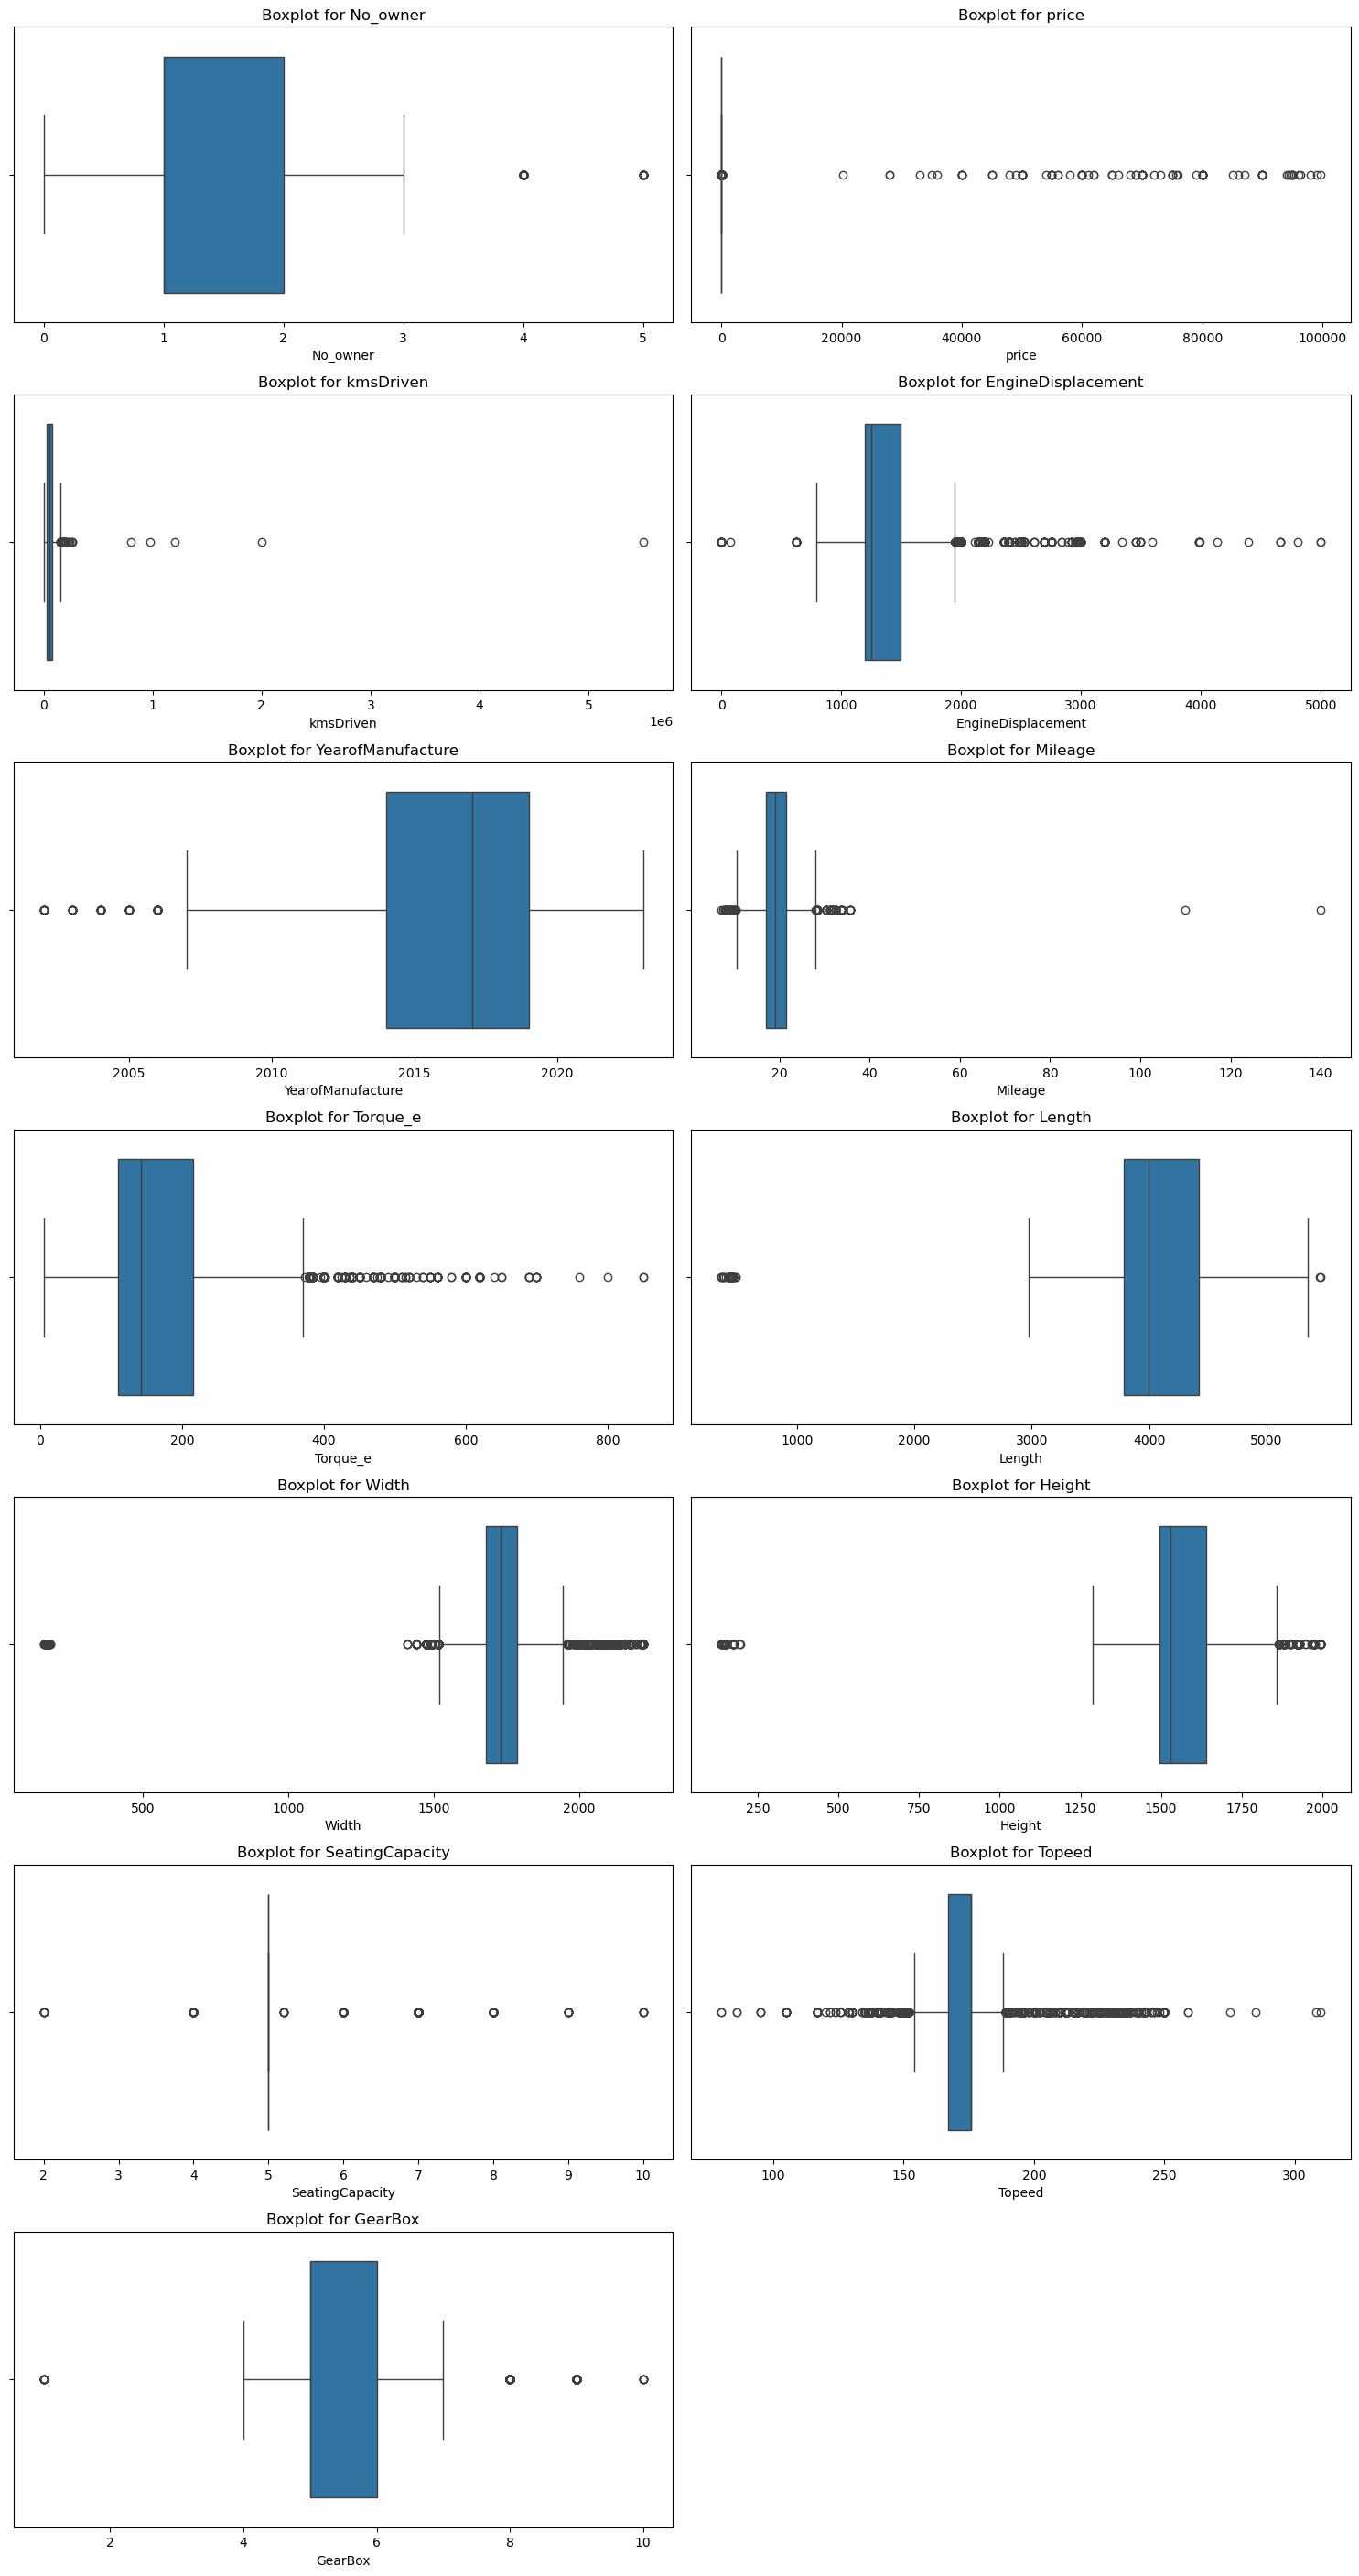

In [43]:
numerical_cols = ncar.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1
for col in numerical_cols:
        ax = plt.subplot(20, 2, plotnumber)
        sns.boxplot(data=ncar,x=col)
        plt.title(f'Boxplot for {col}')
        plotnumber += 1
        
plt.tight_layout()  
plt.show()

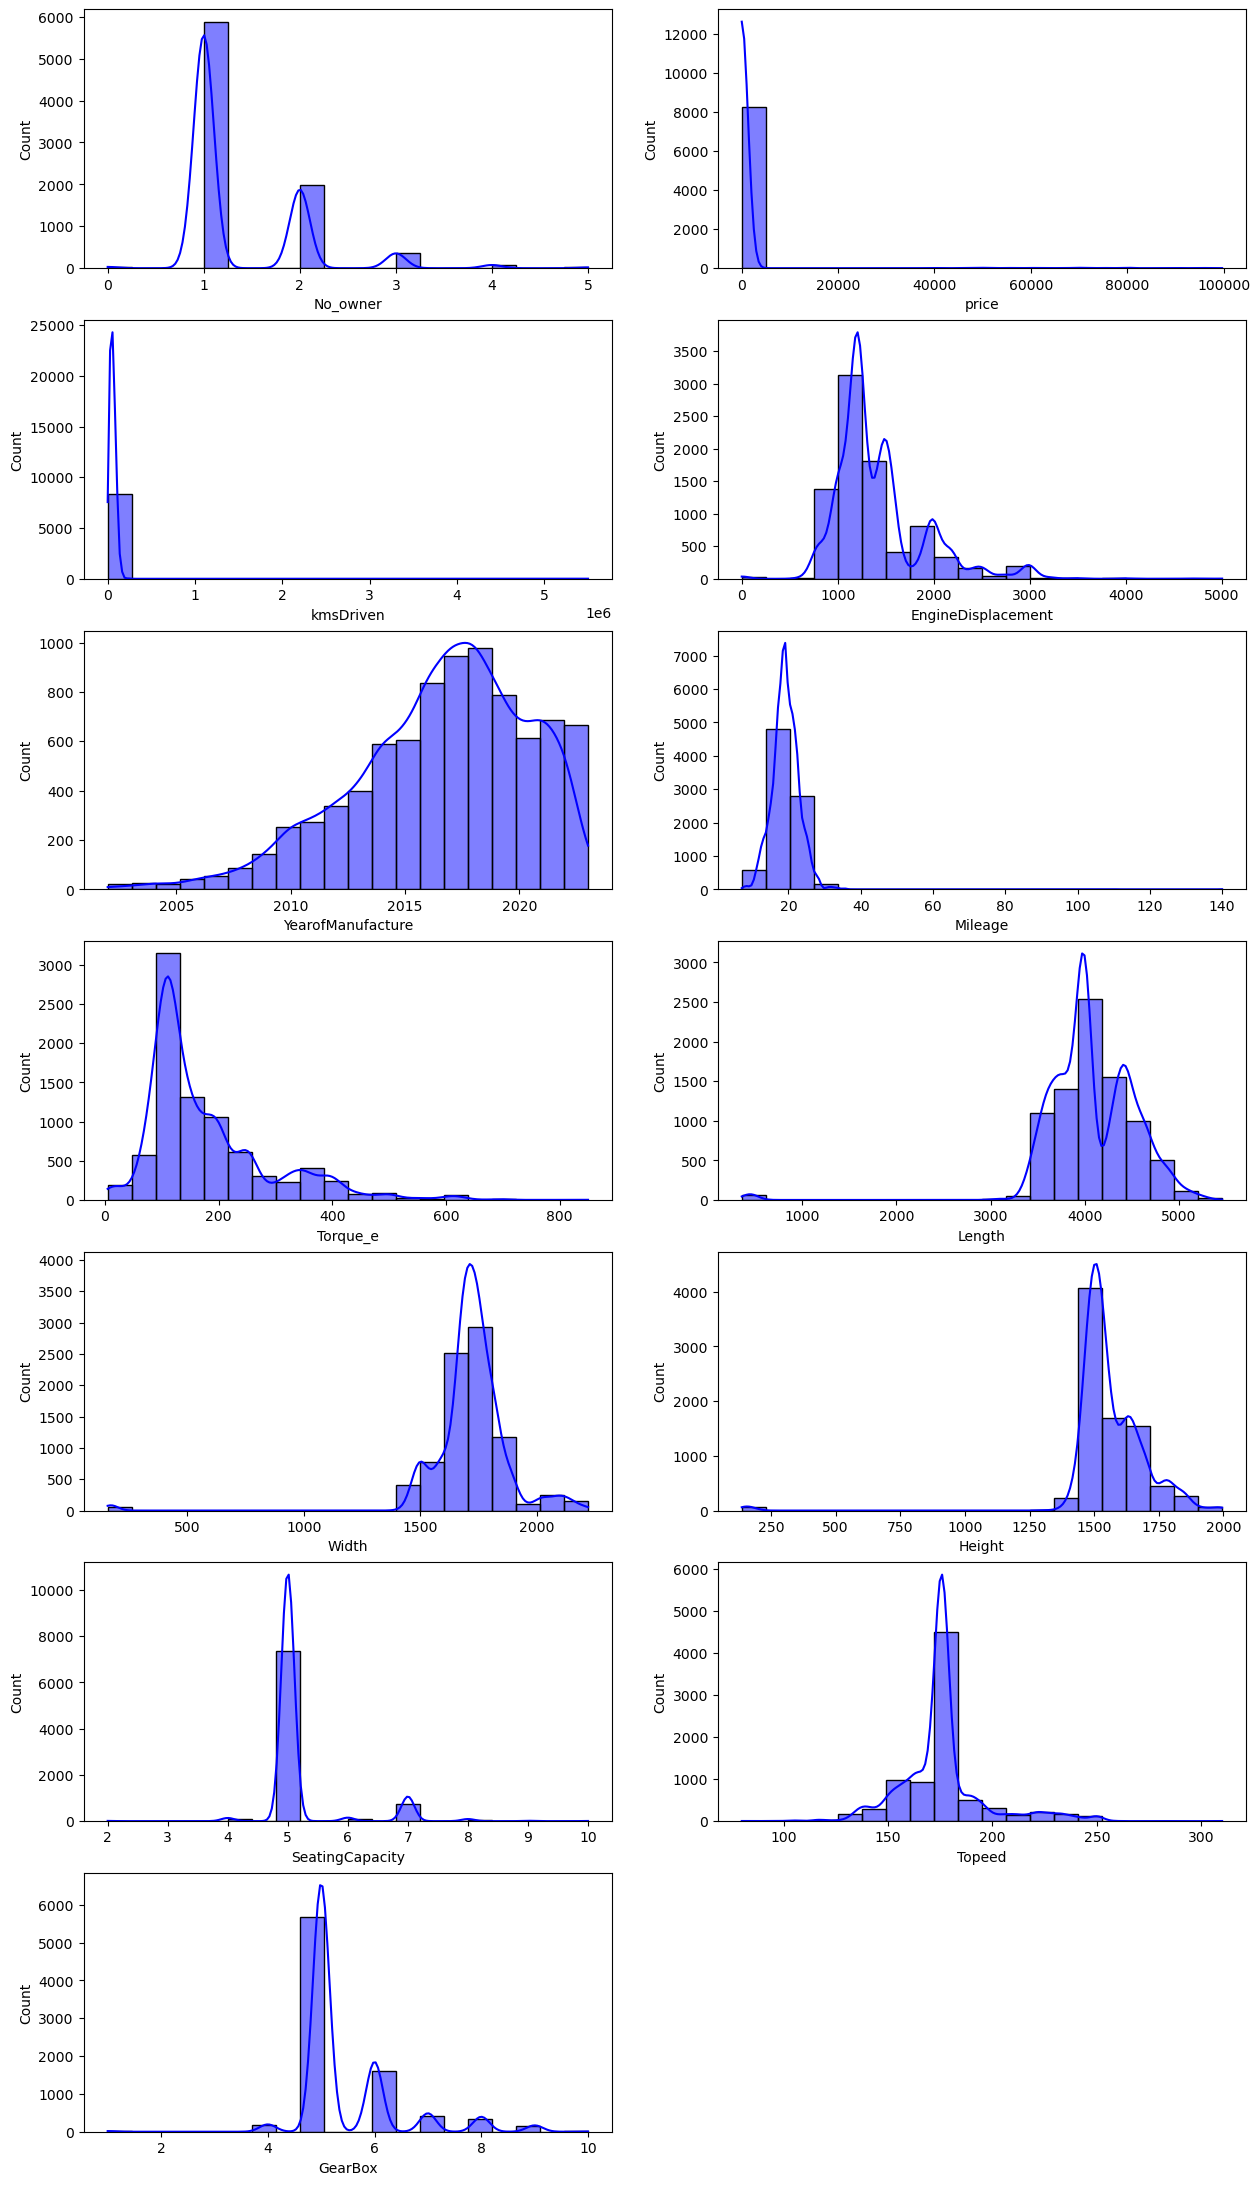

In [45]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for feature in numerical_cols:
    ax = plt.subplot(20,2,plotnumber)
    sns.histplot(ncar[feature],bins=20,kde=True, color='blue')
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

### After removing the outliers

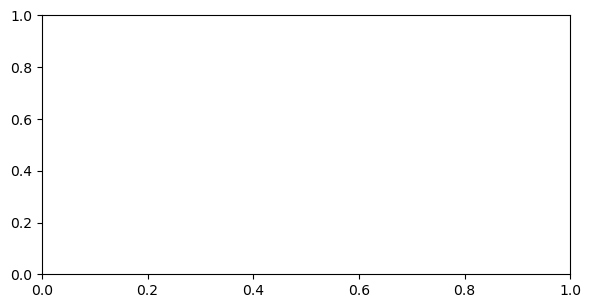

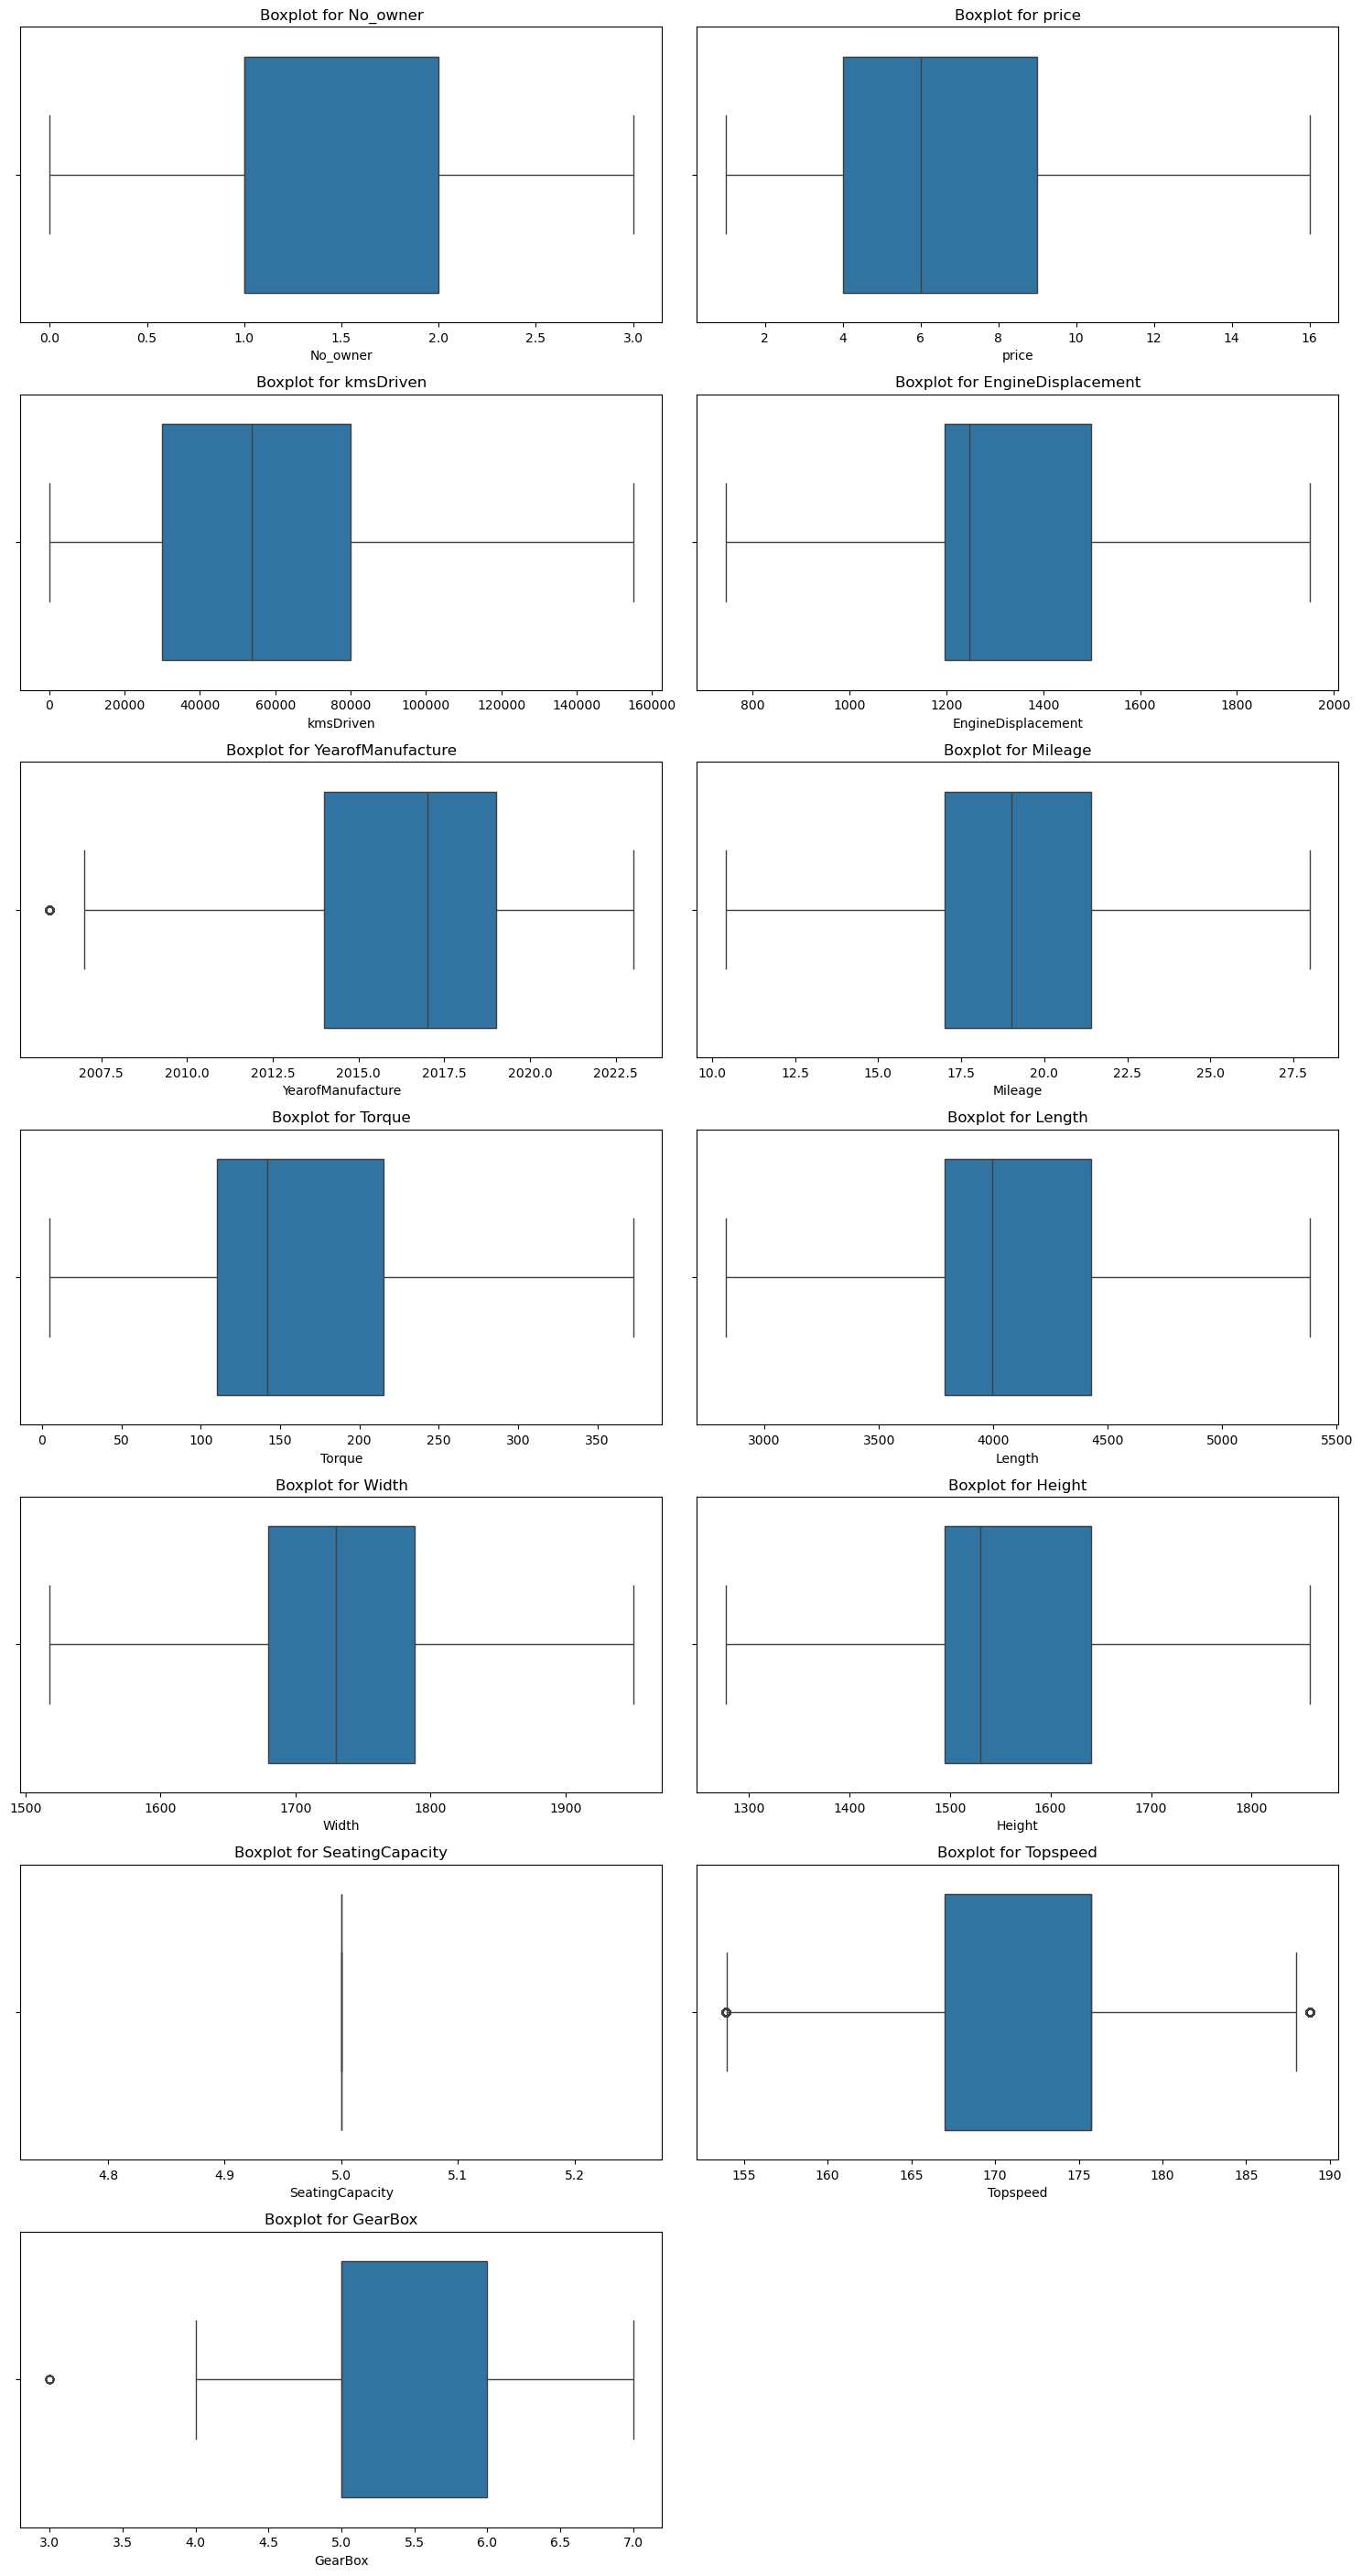

In [50]:
numerical_cols = carclean.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1
for col in numerical_cols:
        ax = plt.subplot(20, 2, plotnumber)
        sns.boxplot(data=carclean,x=col)
        plt.title(f'Boxplot for {col}')
        plotnumber += 1
        
plt.tight_layout()  
plt.show()

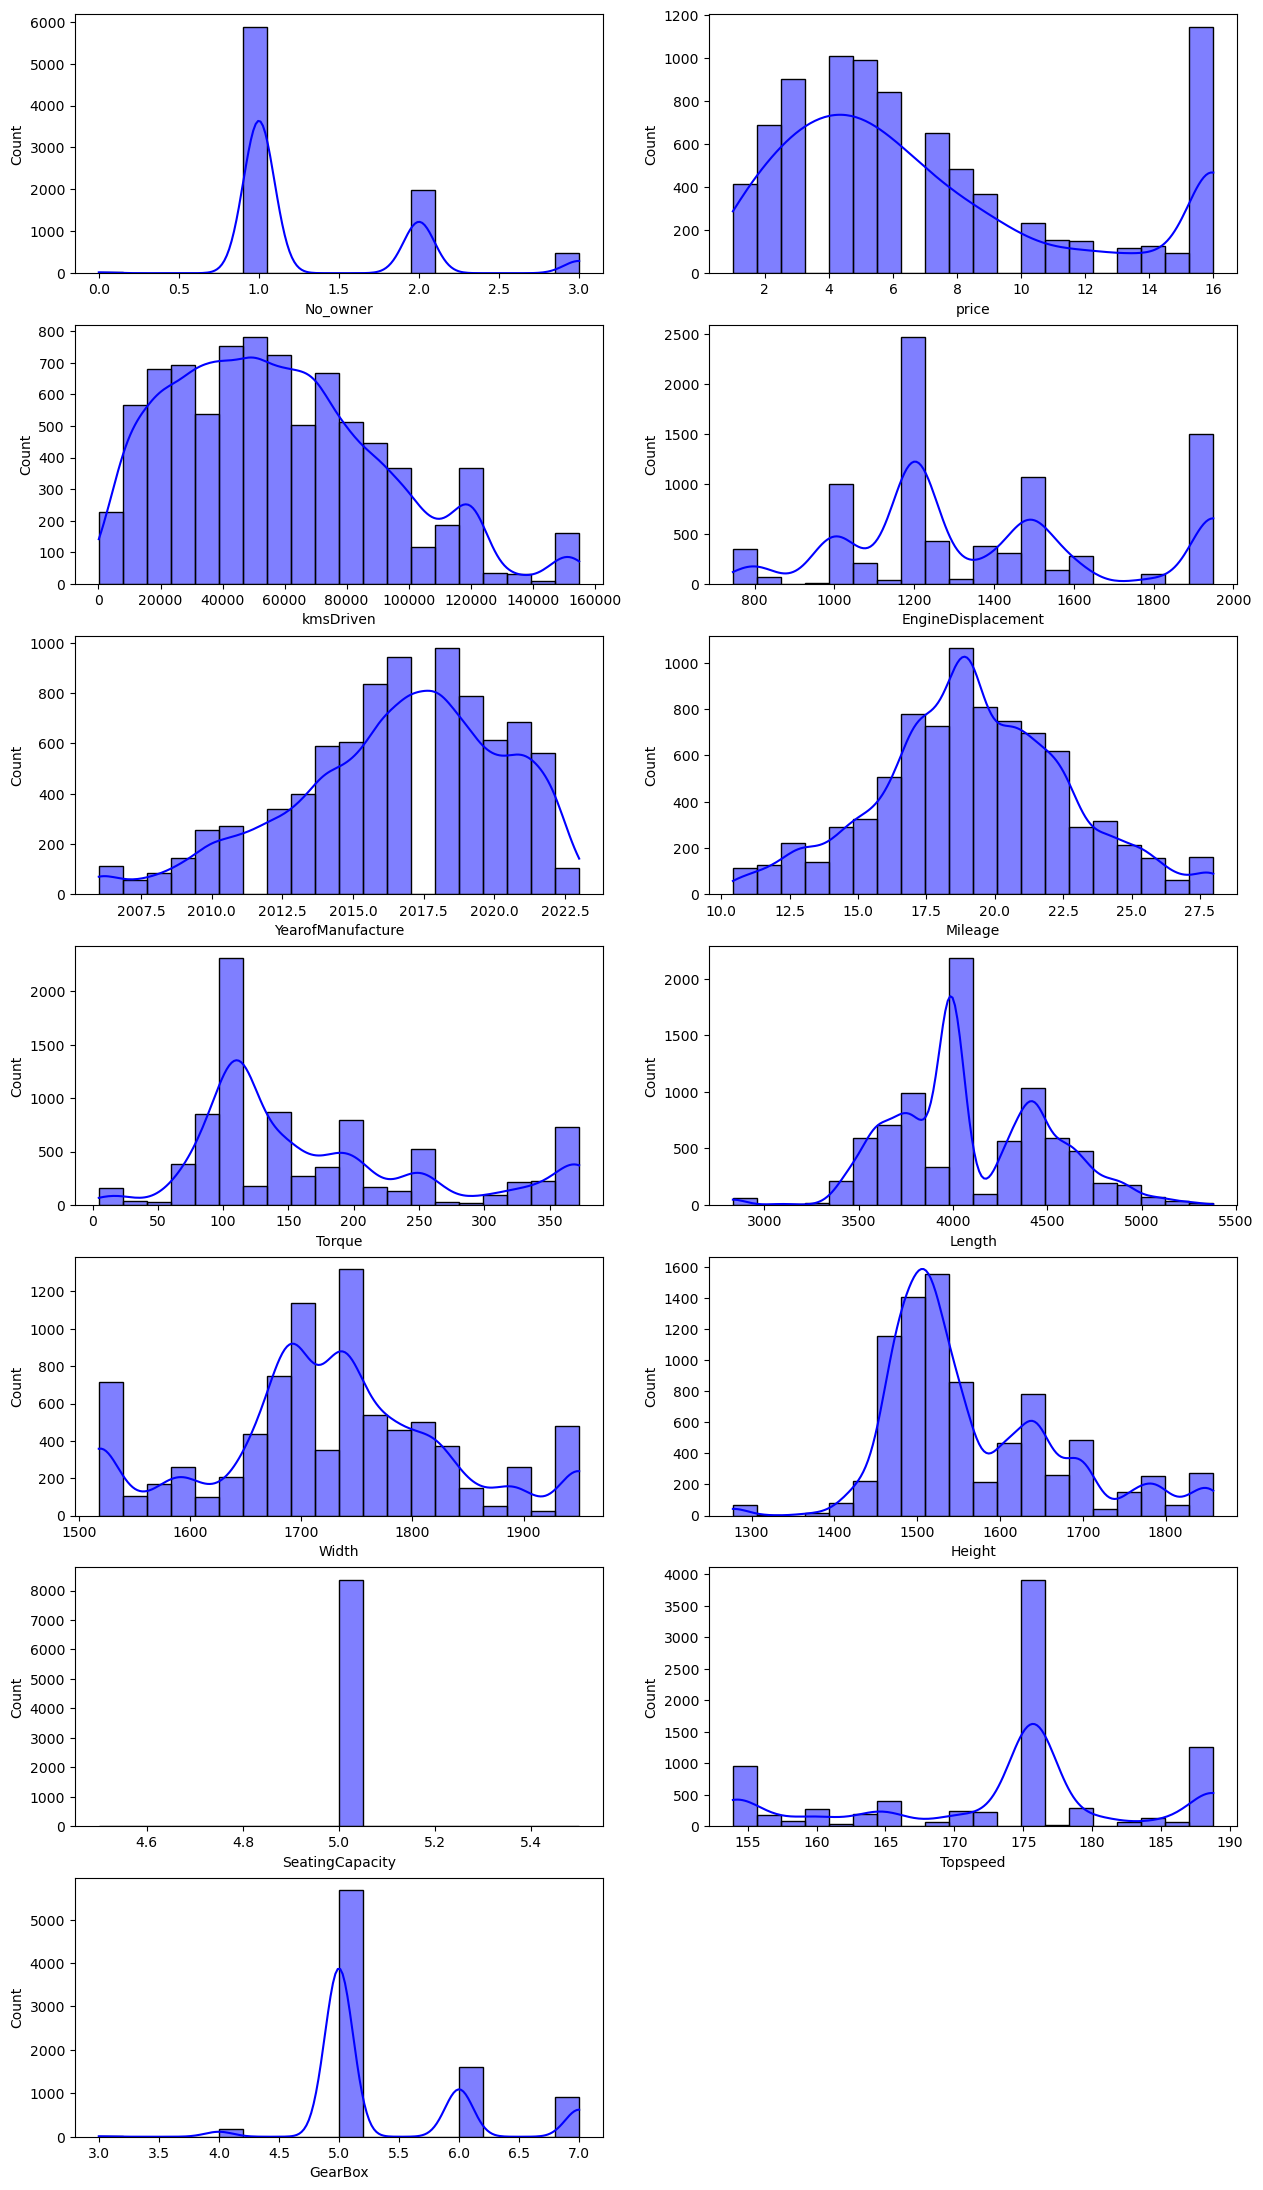

In [52]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for feature in numerical_cols:
    ax = plt.subplot(20,2,plotnumber)
    sns.histplot(carclean[feature],bins=20,kde=True, color='blue')
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

### Categorical Visualisation

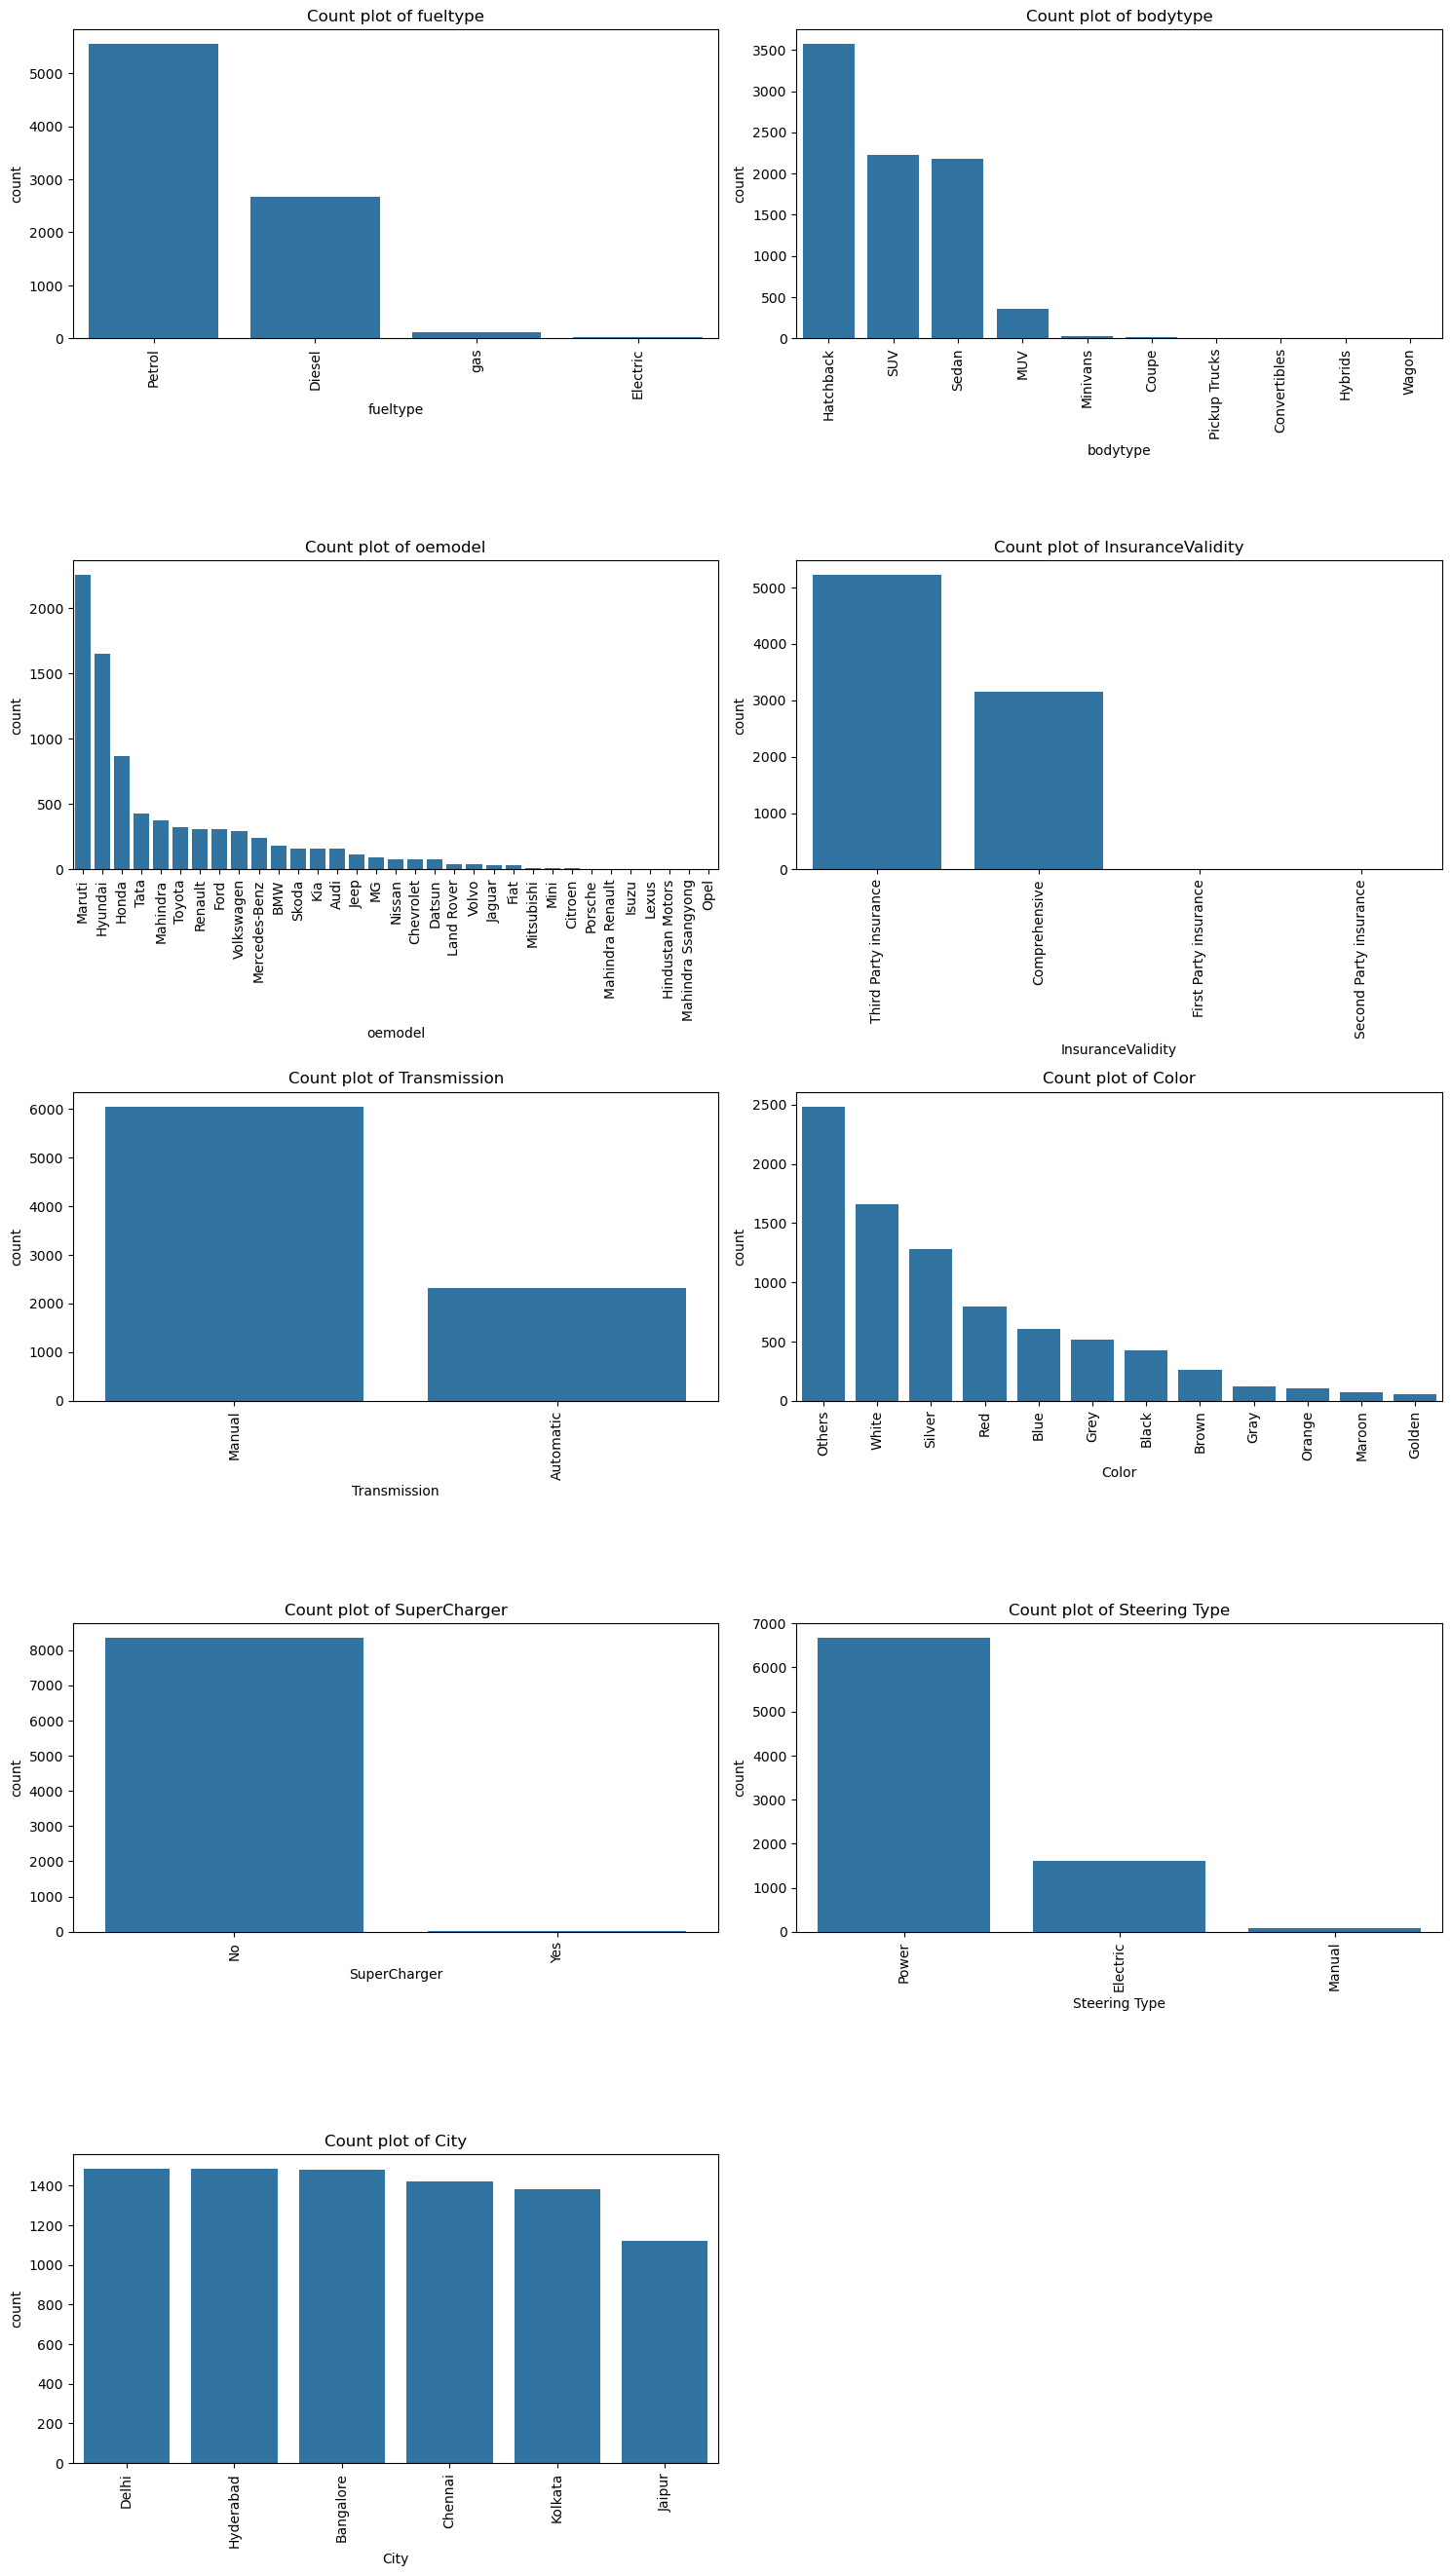

In [55]:
categorical_cols = carclean.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 80))
plotnumber = 1
for feature in categorical_cols:
    ax = plt.subplot(15, 2, plotnumber)  
    sns.countplot(data=carclean, x=feature, order=carclean[feature].value_counts().index)
    plt.xticks(rotation=90) 
    plt.title(f'Count plot of {feature}')    
    plotnumber += 1

plt.tight_layout()
plt.show()


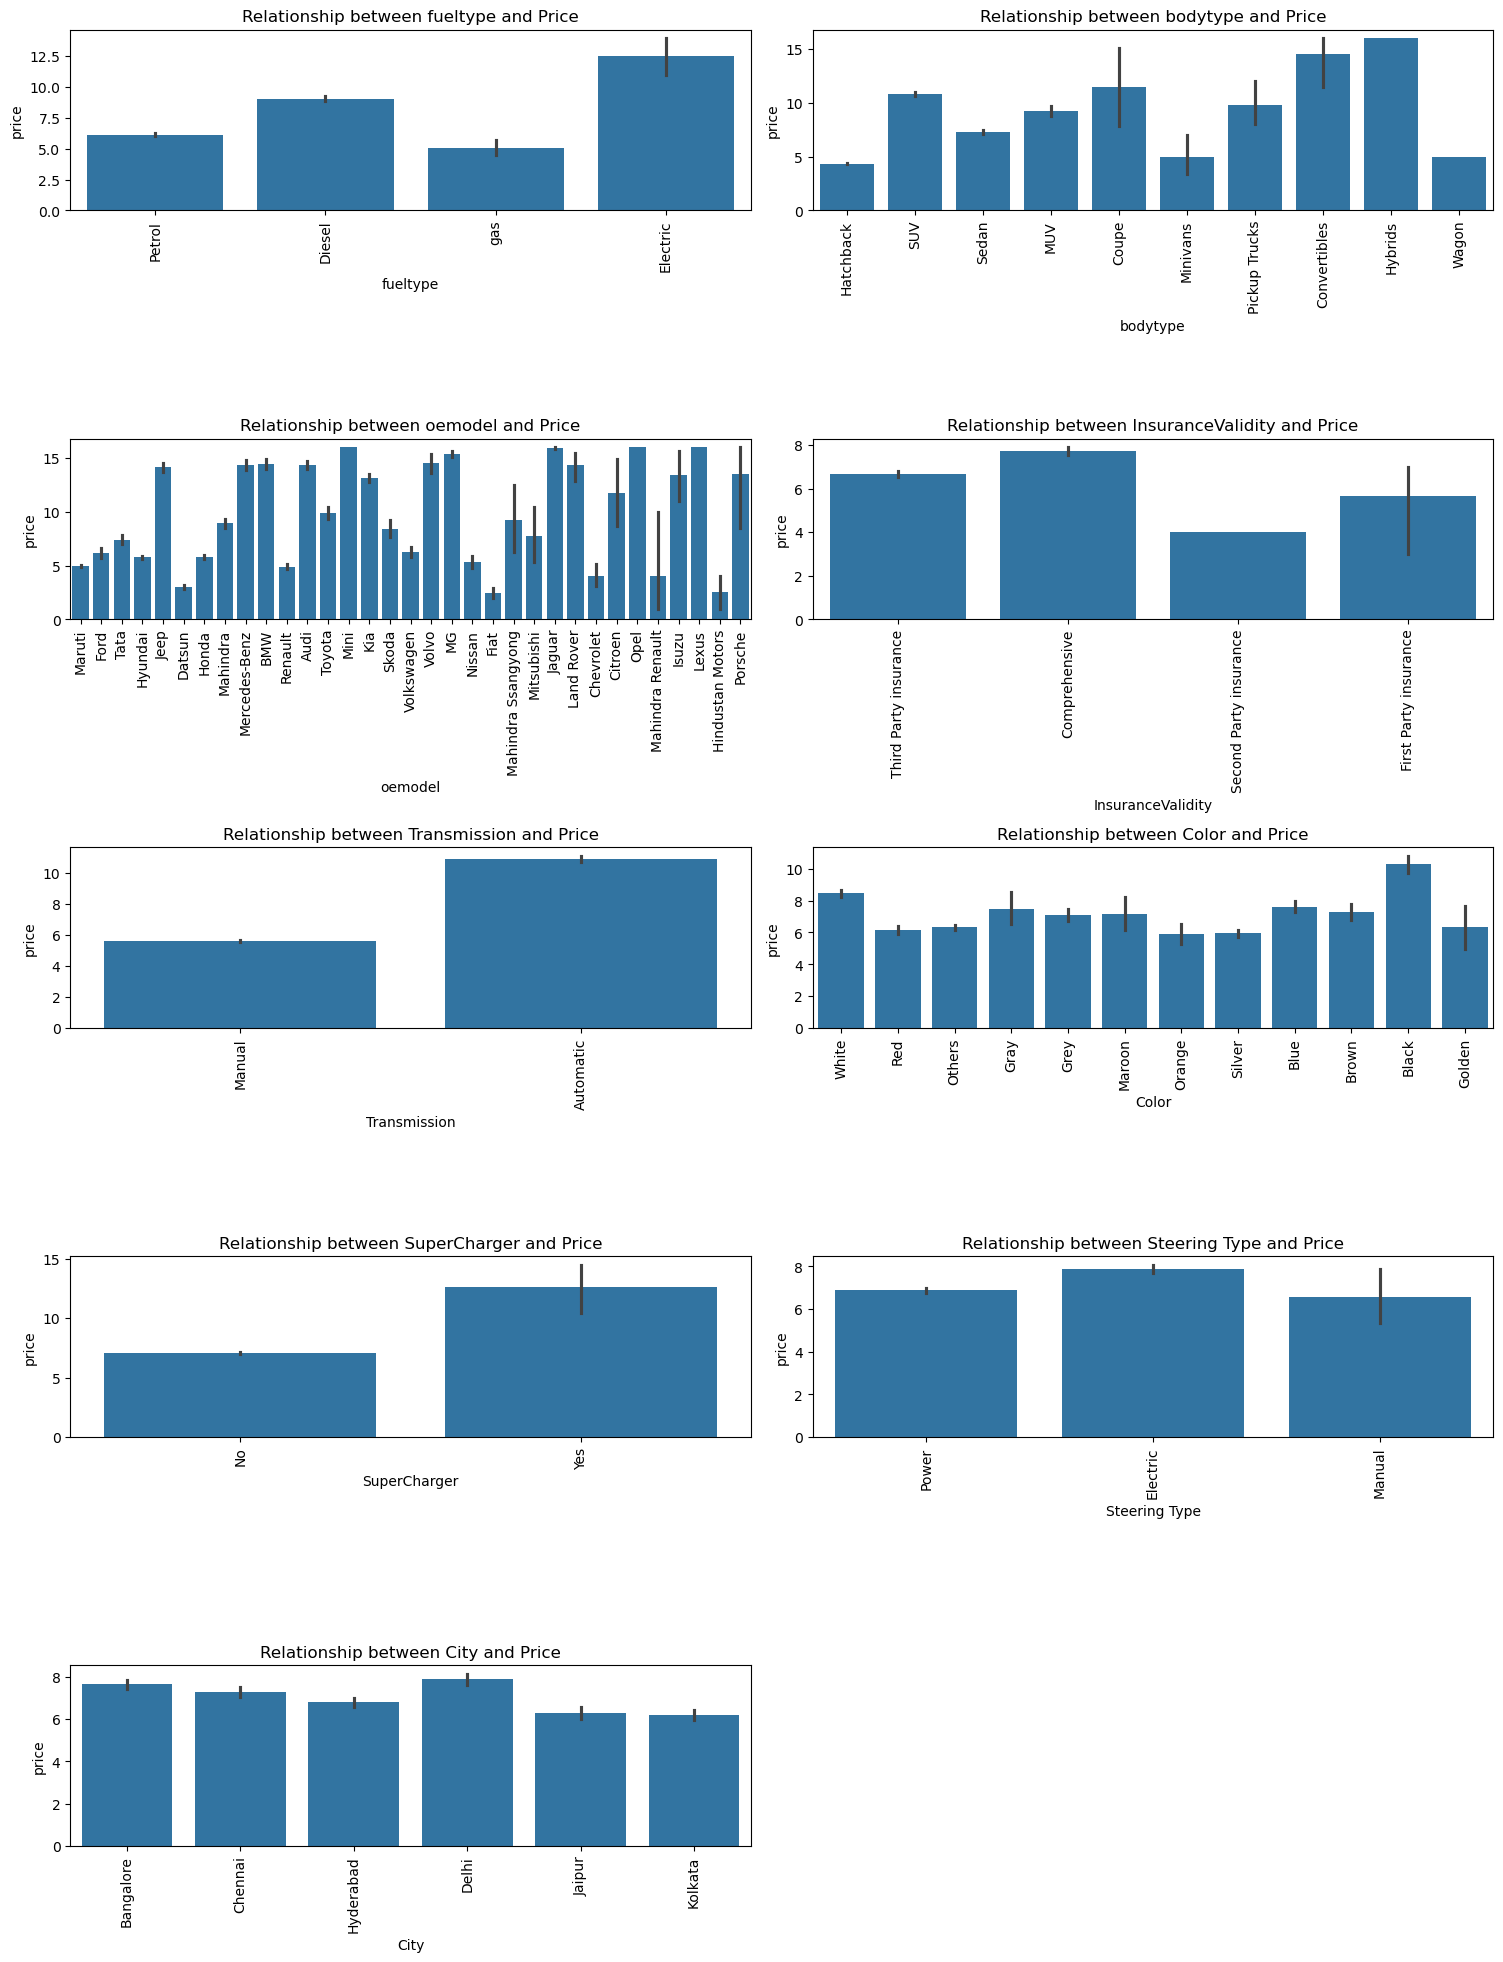

In [57]:
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1
for col in categorical_cols:
    if col != 'price':
        ax = plt.subplot(20, 2, plotnumber)
        sns.barplot(x=carclean[col], y=carclean['price'])
        plt.title(f'Relationship between {col} and Price')
        plt.xticks(rotation=90) 
        plotnumber += 1
        
plt.tight_layout()  
plt.show()

## Checking corelation

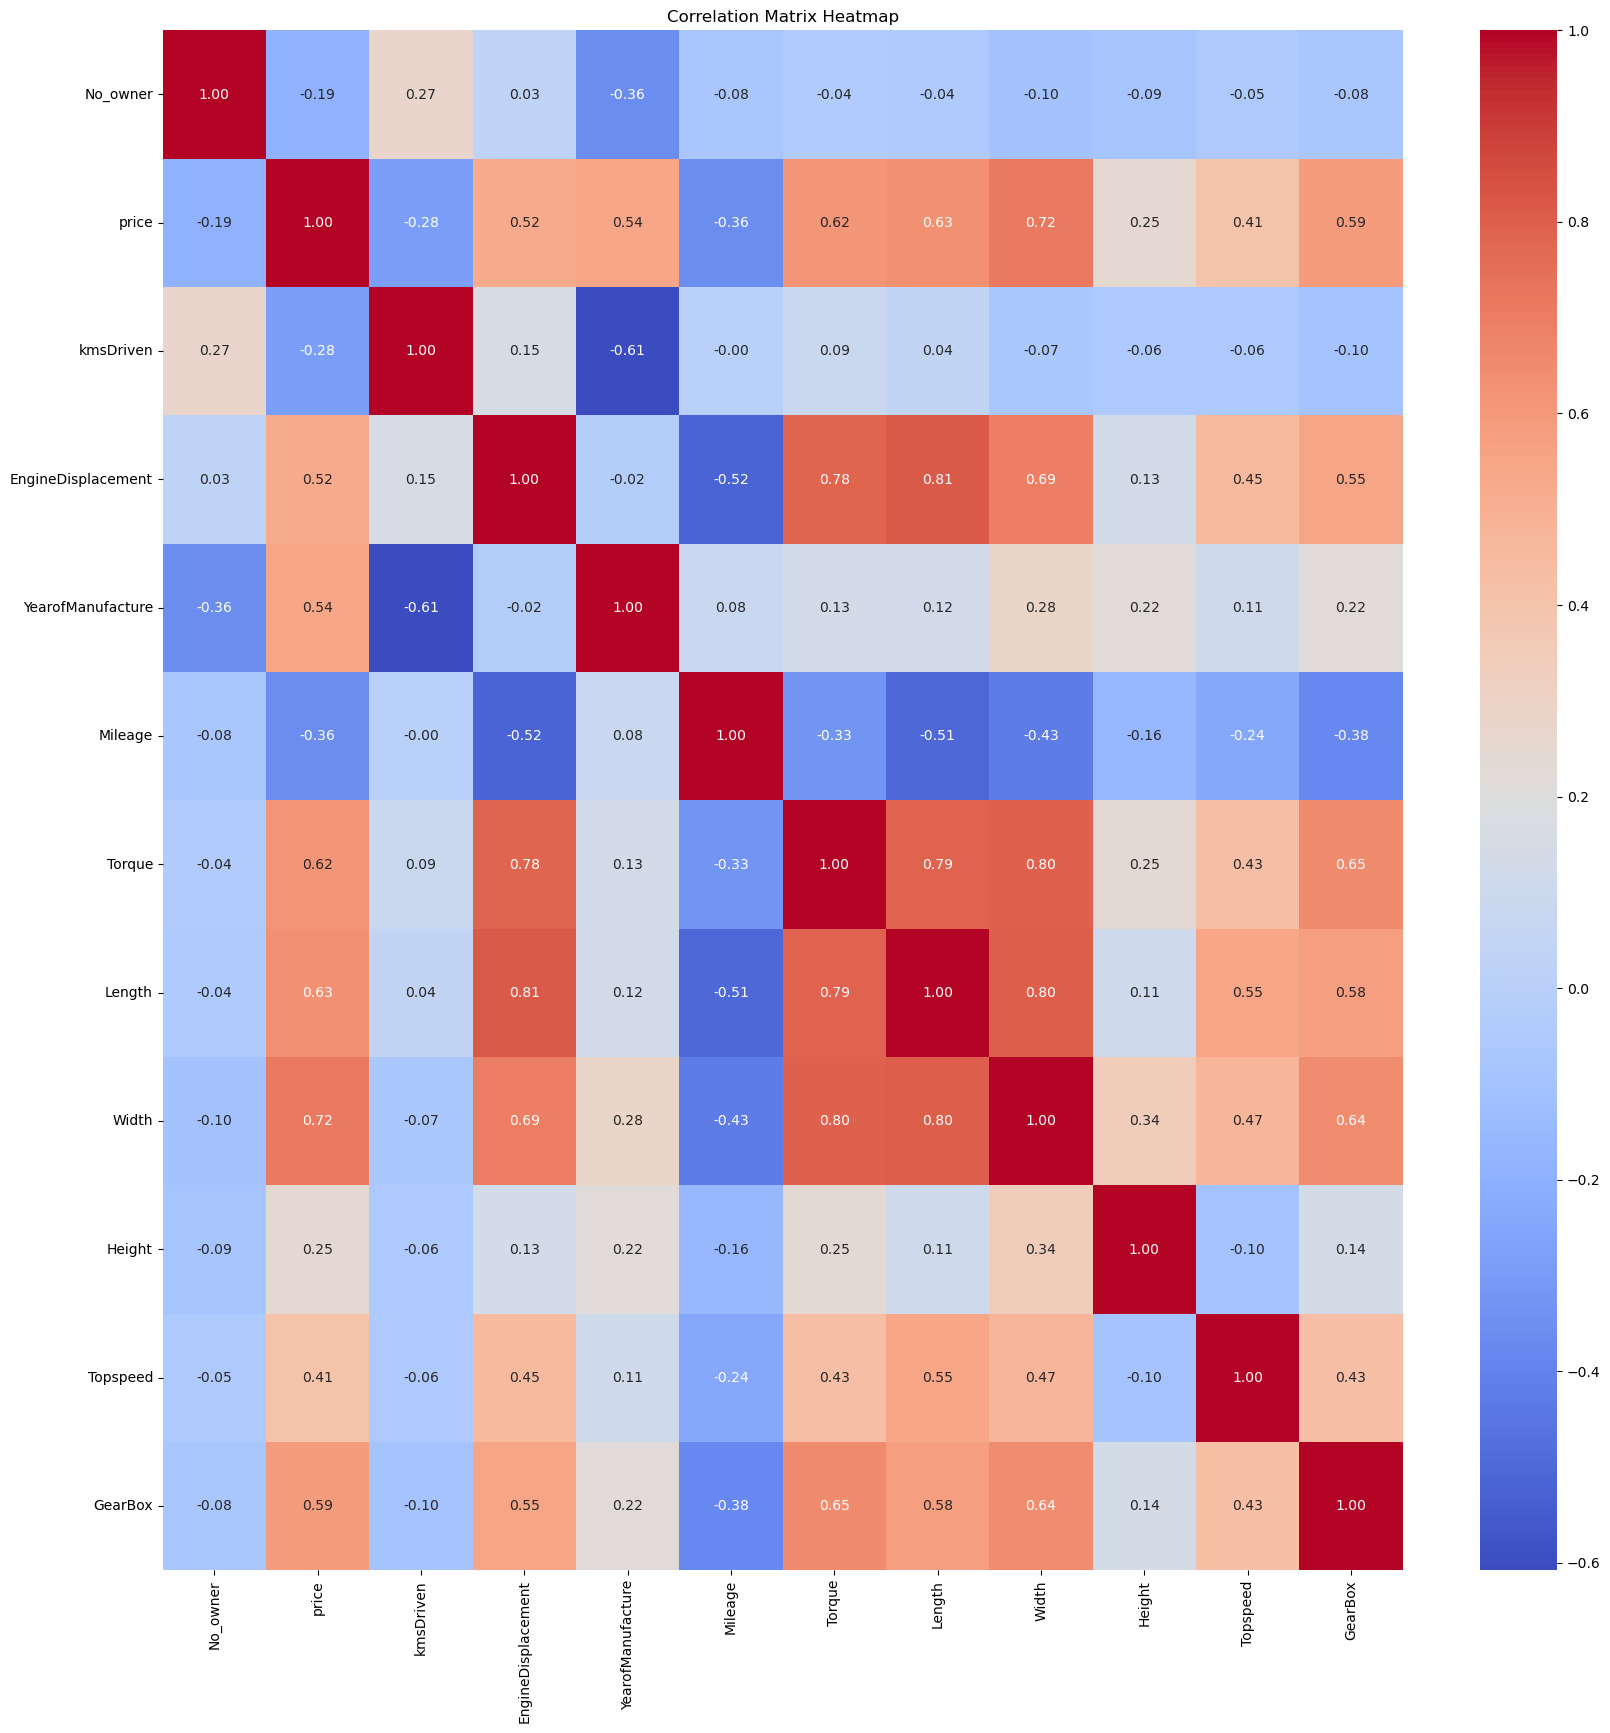

In [66]:
carclean.drop(columns='SeatingCapacity',axis=1,inplace=True)
correlation_matrix = carclean.corr(method='spearman',numeric_only=True) 
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Model Development

Top important features:
 Width                 0.508322
YearofManufacture     0.137593
Length                0.066323
Transmission          0.064042
Torque                0.051143
kmsDriven             0.030079
City                  0.024109
EngineDisplacement    0.022348
Mileage               0.018796
Height                0.018353
dtype: float64


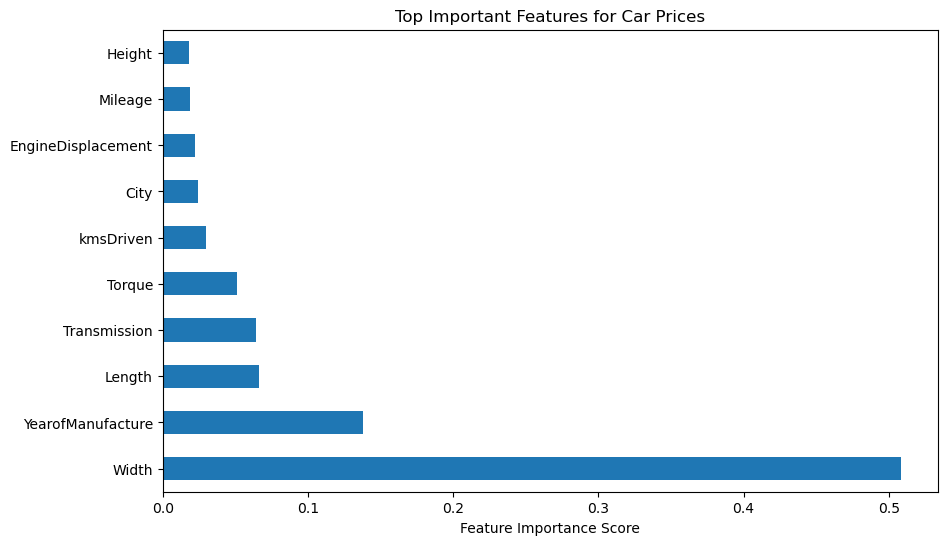

In [71]:

def identify_important_features(df):
    # Handle categorical data with label encoding for simplicity
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include=['object']).columns:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

    # Split data into features and target variable
    X = df_encoded.drop('price', axis=1)
    y = df_encoded['price']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_features = feature_importances.sort_values(ascending=False).head(10)
    print("Top important features:\n", top_features)

    # Plot top important features
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh')
    plt.title('Top Important Features for Car Prices')
    plt.xlabel('Feature Importance Score')
    plt.show()

identify_important_features(carclean)



### Label Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder

label_cat = ['Transmission', 'InsuranceValidity', 'SuperCharger','Steering Type']

label_encoder = LabelEncoder()

for col in label_cat:
    carclean[col + '_Encoded'] = label_encoder.fit_transform(carclean[col])

# Check the encoded columns
#print(carclean[[col + '_Encoded' for col in label_cat]].head())
carclean.head()

,fueltype,bodytype,No_owner,oemodel,price,InsuranceValidity,kmsDriven,EngineDisplacement,Transmission,YearofManufacture,Mileage,Torque,Color,SuperCharger,Length,Width,Height,Steering Type,Topspeed,City,GearBox,Transmission_Encoded,InsuranceValidity_Encoded,SuperCharger_Encoded,Steering Type_Encoded
0,Petrol,Hatchback,3,Maruti,4,Third Party insurance,120000,998.0,Manual,2015,23.10,90.0,White,No,3715.0,1635.0,1565.0,Power,153.933369,Bangalore,5,1,3,0,2
1,Petrol,SUV,2,Ford,8,Comprehensive,32706,1497.0,Manual,2018,17.00,150.0,White,No,3998.0,1765.0,1647.0,Power,175.711088,Bangalore,5,1,0,0,2
2,Petrol,Hatchback,1,Tata,5,Comprehensive,11949,1199.0,Manual,2018,23.84,114.0,Red,No,3746.0,1647.0,1535.0,Power,153.933369,Bangalore,5,1,0,0,2
3,Petrol,Sedan,1,Hyundai,4,Comprehensive,17794,1197.0,Manual,2014,19.10,113.7,Others,No,3995.0,1660.0,1520.0,Power,172.000000,Bangalore,5,1,0,0,2
4,Diesel,SUV,1,Maruti,7,Third Party insurance,60000,1248.0,Manual,2015,23.65,200.0,Gray,No,4300.0,1785.0,1595.0,Power,188.777719,Bangalore,5,1,3,0,2


In [78]:
carclean.drop(columns=['Transmission', 'InsuranceValidity', 'SuperCharger','Steering Type'],axis=1,inplace=True)

In [80]:
carclean.head()

,fueltype,bodytype,No_owner,oemodel,price,kmsDriven,EngineDisplacement,YearofManufacture,Mileage,Torque,Color,Length,Width,Height,Topspeed,City,GearBox,Transmission_Encoded,InsuranceValidity_Encoded,SuperCharger_Encoded,Steering Type_Encoded
0,Petrol,Hatchback,3,Maruti,4,120000,998.0,2015,23.10,90.0,White,3715.0,1635.0,1565.0,153.933369,Bangalore,5,1,3,0,2
1,Petrol,SUV,2,Ford,8,32706,1497.0,2018,17.00,150.0,White,3998.0,1765.0,1647.0,175.711088,Bangalore,5,1,0,0,2
2,Petrol,Hatchback,1,Tata,5,11949,1199.0,2018,23.84,114.0,Red,3746.0,1647.0,1535.0,153.933369,Bangalore,5,1,0,0,2
3,Petrol,Sedan,1,Hyundai,4,17794,1197.0,2014,19.10,113.7,Others,3995.0,1660.0,1520.0,172.000000,Bangalore,5,1,0,0,2
4,Diesel,SUV,1,Maruti,7,60000,1248.0,2015,23.65,200.0,Gray,4300.0,1785.0,1595.0,188.777719,Bangalore,5,1,3,0,2


## Train-Test Split

In [83]:
X = carclean.drop(columns=['price'],axis=1) # Replace with your actual feature columns
y = carclean['price']  # Replace with your target column


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the categorical columns
categorical_columns = ['fueltype', 'bodytype', 'oemodel', 'Color', 'City']  # Example categorical columns

# Configure the OneHotEncoder to ignore unknown categories
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Apply encoder to train and test sets separately
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_columns)], 
    remainder='passthrough'  # Keep the other (numerical) columns as they are
)

# Fit the preprocessor on the training data and transform both train and test sets
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


C:\Users\mraja\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Scaling

In [90]:
scaler = StandardScaler()

# Scale both train and test sets (assuming numerical features are at the end)
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


### RandomForest Model

In [92]:

# Fit the Random Forest model
mr = RandomForestRegressor(n_estimators=100,random_state=42)
mr.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = mr.predict(X_train_scaled)
y_test_pred = mr.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Train R²: 0.9787199366419934
Test R²: 0.8584360659904448
Train MSE: 0.4574578712267505
Test MSE: 3.037138691905615


### Linear Regression Model

In [96]:

# Train a linear regression model on the scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train R²: 0.7258983501764995
Test R²: 0.7438775838549564
Train MSE: 5.892367664442181
Test MSE: 5.494897449557725


### Decision Tree Model

In [99]:

# Fit the Decision Tree model
md = DecisionTreeRegressor(random_state=42)
md.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = md.predict(X_train_scaled)
y_test_pred = md.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")




Train R²: 0.9997382851176293
Test R²: 0.7567341912818655
Train MSE: 0.005626089121234753
Test MSE: 5.2190694278507905


### Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit the Gradient Boosting model
mg = GradientBoostingRegressor(random_state=42)
mg.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = mg.predict(X_train_scaled)
y_test_pred = mg.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train R²: 0.8644185502738212
Test R²: 0.8398462841083152
Train MSE: 2.914596649743459
Test MSE: 3.435967293436925


### SVR Model

In [109]:
from sklearn.svm import SVR

# Fit the SVM model
sv = SVR()
sv.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = sv.predict(X_train_scaled)
y_test_pred = sv.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Train R²: 0.7931531823224747
Test R²: 0.7896436283119912
Train MSE: 4.446589434104606
Test MSE: 4.513024309563247


# Optimisation

### L1 Regularization

In [120]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Apply Lasso regularization (L1)
lasso_model = Lasso(alpha=0.1)  # Adjust alpha to control the strength of the penalty
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Lasso Train R²: {train_r2}")
print(f"Lasso Test R²: {test_r2}")
print(f"Lasso Train MSE: {train_mse}")
print(f"Lasso Test MSE: {test_mse}")


Lasso Train R²: 0.7042198431338071
Lasso Test R²: 0.7265539597697874
Lasso Train MSE: 6.358390886097344
Lasso Test MSE: 5.86656166870512


### L2 Regularization

In [123]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Apply Ridge regularization (L2)
ridge_model = Ridge(alpha=0.01)  # Adjust alpha to control the strength of the penalty
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Ridge Train R²: {train_r2}")
print(f"Ridge Test R²: {test_r2}")
print(f"Ridge Train MSE: {train_mse}")
print(f"Ridge Test MSE: {test_mse}")


Ridge Train R²: 0.7258983500796834
Ridge Test R²: 0.7438781355308564
Ridge Train MSE: 5.892367666523438
Ridge Test MSE: 5.494885613801445


In [125]:
from sklearn.model_selection import cross_val_score

# Example with cross-validation
scores = cross_val_score(mr, X_train_encoded, y_train, cv=5, scoring='r2')
print("Cross-validation R2 scores:", scores)
print("Mean cross-validation score:", scores.mean())



Cross-validation R2 scores: [0.84988398 0.85597247 0.81981285 0.85767934 0.81701318]
Mean cross-validation score: 0.8400723643495424
